## Introduction

**Name: Philipa Opoku**  
**Dataset: AI4I 2020 Predictive Maintenance Dataset**

**Objective:**  
To analyze machine operational data and predict potential failures before they occur using data-driven techniques.

**Overview:**  

The dataset contains process parameters such as air temperature, process temperature, rotational speed, torque, and tool wear.

It also includes failure indicators: Tool Wear Failure (TWF), Heat Dissipation Failure (HDF), Power Failure (PWF), Overstrain Failure (OSF), and Random Failure (RNF).

The project follows a structured data science workflow covering data understanding, cleaning, EDA, feature engineering, modeling, and result interpretation.

**Goal:**  
To build an effective predictive maintenance model that supports better maintenance planning and reduces unplanned downtime.


## Importing Required Libraries

This section imports all the **essential libraries** used for data analysis, visualization, model training, and deployment in the predictive maintenance project.

- **pandas, numpy** → For data handling and numerical computation.  
- **matplotlib, seaborn** → For data visualization and graphical exploration.  
- **scipy.stats** → For statistical analysis (skewness, kurtosis, and hypothesis testing).  
- **scikit-learn (sklearn)** → For preprocessing, model selection, training, and evaluation.  
- **lightgbm, xgboost, catboost** → For implementing advanced gradient boosting models.  
- **pickle** → For saving and loading trained models efficiently.  
- **warnings, seaborn.set()** → For configuration and cleaner outputs during model development.  


In [54]:
# -------------------------------------------------------------
# Importing Required Libraries
# -------------------------------------------------------------
# Data handling and numerical computation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy.stats import skew, kurtosis
import scipy.stats as stats

# Machine learning preprocessing and evaluation tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Advanced gradient boosting models
import lightgbm as LGB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Import the pickle module for saving and loading the trained model
import pickle

# Configuration and general settings
import warnings
warnings.filterwarnings("ignore")
sns.set()


### Data Import
The dataset is loaded from the local directory using `pandas.read_csv()`.  
It contains sensor readings, operating conditions, and failure information used for predictive maintenance modeling.


In [55]:
# Load the dataset from the specified file path into a pandas DataFrame.
# This dataset contains sensor readings and failure labels for predictive maintenance analysis.

data = pd.read_csv(r"C:\Users\Philipa Opoku\Desktop\TECHCRUSH\WEEK 10\Capstone\ai4i+2020+predictive+maintenance+dataset\ai4i2020.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


## Exploring the Data  

Before analysis, it is important to understand the structure and characteristics of the dataset.  
We will:  
- Preview sample records using `.head()` to confirm columns and values.  
- Use `.info()` to inspect column datatypes, non-null counts, and memory usage.  
- Check for missing values with `.isna().sum()` to identify potential data cleaning needs.  
- Check for duplicate records using `.duplicated().sum()`.  
- Inspect dataset dimensions using `.shape`.  
- Generate summary statistics for numerical columns with `.describe()`.  
- Count unique values per column using `.nunique()`.  

Additionally, we will explore:  
- How many machine failures occurred in total.  
- Which specific failure types occurred most frequently.  
- Machines that experienced multiple failure types simultaneously.  
- Failure distribution across different machine types.


In [56]:
# Display the first 5 rows of the dataset to get an overview of its structure and sample values

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [57]:
# Display concise summary information about the dataset, including
# column names, data types, non-null counts, and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [58]:
# Display the number of rows and columns in the dataset

data.shape

(10000, 14)

In [59]:
# Check for missing (NaN) values in each column and count how many are present

data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [60]:
# Check for duplicate rows in the dataset and count how many exist

data.duplicated().sum()

0

In [61]:
# Generate descriptive statistics for all numeric columns in the dataset

data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [62]:
# Display the number of unique (distinct) values in each column

data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [63]:
# Count the number of occurrences for machine failures (1) and non-failures (0)

machine_failure_counts = data["Machine failure"].value_counts()

# Display the counts

machine_failure_counts

Machine failure
0    9661
1     339
Name: count, dtype: int64

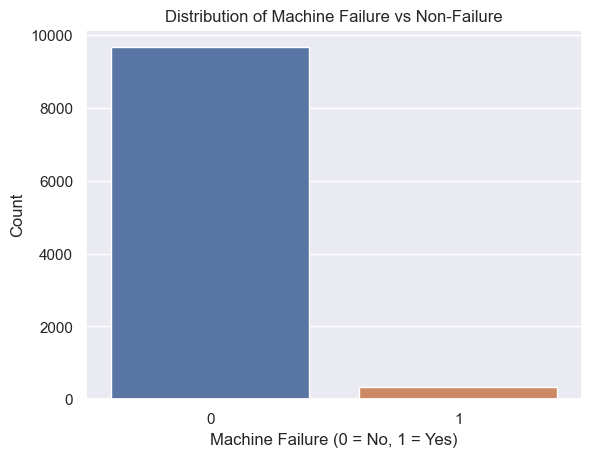

In [64]:
# Visualize how often machines failed (1) versus operated normally (0)

sns.barplot(x=machine_failure_counts.index, y=machine_failure_counts.values)
plt.title("Distribution of Machine Failure vs Non-Failure")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [65]:
# Calculate the total occurrences of each specific failure type

failure_type_counts = data[["TWF", "HDF", "PWF", "OSF", "RNF"]].sum()

# Display the counts per failure type

failure_type_counts

TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64

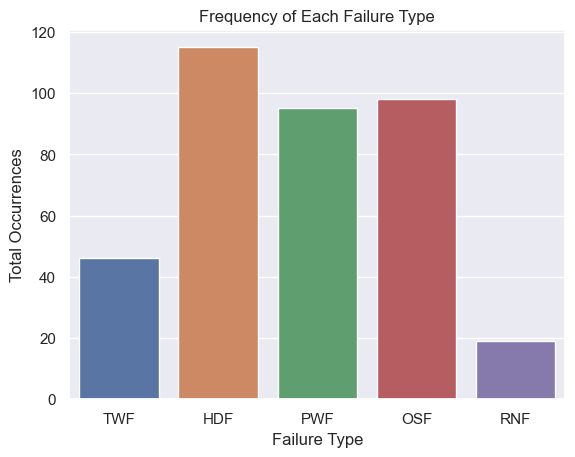

In [66]:
# Plot the frequency of each failure type to identify the most common cause of failure.

sns.barplot(x=failure_type_counts.index, y=failure_type_counts.values)
plt.title("Frequency of Each Failure Type")
plt.xlabel("Failure Type")
plt.ylabel("Total Occurrences")
plt.show()

In [67]:
# Identify machines that experienced exactly one failure type at a time.

one_failure = data[(data[["TWF", "HDF", "PWF", "OSF", "RNF"]].sum(axis=1) == 1)]

# Display all records where exactly one failure type occurred.
# This helps identify machines that experienced a single isolated failure event.

one_failure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
168,169,L47348,L,298.4,308.3,1433,62.3,20,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,9668,L56847,L,299.2,310.3,1352,48.9,238,1,0,0,0,1,0
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0


In [68]:
# Identify machines that experienced two simultaneous failures.

two_failure = data[(data[["TWF", "HDF", "PWF", "OSF", "RNF"]].sum(axis=1) == 2)]

# Display all records where exactly two different failure types occurred simultaneously.
# This helps analyze cases of multiple concurrent failure modes.

two_failure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
1324,1325,M16184,M,298.8,310.1,1243,74.5,194,1,0,0,1,1,0
1496,1497,L48676,L,298.0,308.7,1268,69.4,189,1,0,0,1,1,0
3611,3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1
3854,3855,L51034,L,302.4,311.0,1338,67.6,194,1,0,0,1,1,0
3943,3944,L51123,L,302.3,311.4,1333,66.7,205,1,0,0,1,1,0
4254,4255,L51434,L,302.6,311.0,1284,68.0,114,1,0,1,1,0,0
4342,4343,M19202,M,301.7,309.8,1284,68.2,111,1,0,1,1,0,0
4370,4371,L51550,L,302.0,309.9,1308,57.6,197,1,0,1,0,1,0
4383,4384,L51563,L,301.7,309.5,1298,65.5,229,1,0,1,0,1,0


In [69]:
# Identify machines that experienced three simultaneous failures.

three_failure = data[(data[["TWF", "HDF", "PWF", "OSF", "RNF"]].sum(axis=1) == 3)]

# Display all records where exactly three different failure types occurred at the same time.
# This provides insight into rare but severe multi-failure conditions.

three_failure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
5909,5910,H35323,H,300.7,310.2,1364,65.3,208,1,1,0,1,1,0


In [70]:
# Identify machines that experienced four simultaneous failures (if any).
# The .shape method is used to confirm whether such cases exist.

four_failure = data[(data[["TWF", "HDF", "PWF", "OSF", "RNF"]].sum(axis=1) == 4)]

# Display the shape (row, column) of the dataset containing machines with four simultaneous failures.
# This confirms whether any machine experienced four types of failure at once.

four_failure.shape


(0, 14)

In [71]:
# Check how many machines belong to each type (L, M, or H).

data["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [72]:
# Calculate the total number of machine failures per machine type.

machine_type_failure_count = data.groupby("Type")["Machine failure"].sum()

# Show the total number of machine failures for each machine type (L, M, H).
# This summary helps identify which machine type experiences failures most frequently.

machine_type_failure_count

Type
H     21
L    235
M     83
Name: Machine failure, dtype: int64

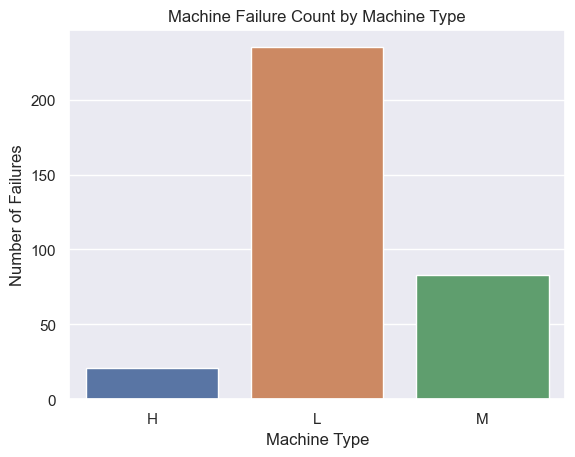

In [73]:
# Visualize failure counts across machine types to see which type fails most often.

sns.barplot(x=machine_type_failure_count.index, y=machine_type_failure_count.values)
plt.title("Machine Failure Count by Machine Type")
plt.xlabel("Machine Type")
plt.ylabel("Number of Failures")
plt.show()

## Exploring the Data – Conclusion

The dataset is clean and consistent, with no missing or duplicate records. All numeric features show reasonable ranges, and no invalid readings were found.

Machine failure cases represent a small portion of total records, showing clear class imbalance that must be considered during modeling.

Among specific failure types, Tool Wear Failure (TWF) occurs most frequently, followed by heat dissipation and overstrain failures. Power and random failures are rare.

Overall, the data is well-structured and ready for deeper analysis and feature exploration.

## Failure Consistency Check and Correction
### Consistency Verification
The dataset includes one general failure column, Machine failure, and five specific failure indicators:  
- TWF – Tool Wear Failure  
- HDF – Heat Dissipation Failure  
- PWF – Power Failure  
- OSF – Overstrain Failure  
- RNF – Random Failure  

A logical consistency check was conducted to ensure that:  

 Whenever any of these individual failures occur, the general failure indicator **(Machine failure)** should also be **1**.  
 **Processing temperature** is greater than or equal to **air temperature**.  
 **Torque** values are greater than or equal to 0. 
 

In [74]:
# Identify rows where machine failure = 1
# but all individual failure type columns = 0

failure_type_cols = ["TWF", "HDF", "OSF", "RNF", "PWF"]  # change names if different

# Condition: machine failed but no specific failure type recorded
inconsistent_rows = data[(data["Machine failure"] == 1) & (data[failure_type_cols].sum(axis=1) == 0)]

# Display inconsistent records
print(f"Number of inconsistent rows: {len(inconsistent_rows)}")
inconsistent_rows.head()

Number of inconsistent rows: 9


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0


In [75]:
# Identify rows where one or more specific failures (TWF, HDF, PWF, OSF, RNF) occurred
# but the general "Machine failure" indicator is still 0.
# These rows are logically inconsistent and need to be reviewed or corrected.

Inconsistent_data = data.loc[
    (data[["TWF","HDF","PWF","OSF","RNF"]].sum(axis=1) > 0) & 
    (data["Machine failure"] == 0)
]

# Display the inconsistent rows

Inconsistent_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


In [76]:
# Print the total number of inconsistent rows found

print(f"Number of inconsistent rows: {Inconsistent_data.shape[0]}")

Number of inconsistent rows: 18


In [77]:
# Update the "Machine failure" column based on the specific failure indicators.
# If any of TWF, HDF, PWF, OSF, or RNF is 1, set "Machine failure" to 1; otherwise, set it to 0.

data["Machine failure"] = (data[["TWF","HDF","PWF","OSF","RNF"]].sum(axis=1) > 0).astype(int)

In [78]:
# Check for physically inconsistent records where processing temperature 
# is lower than air temperature. Such cases may result from sensor or logging errors.

pt_lower_than_at = data[data["Air temperature [K]"] > data["Process temperature [K]"]]

# Show the number of inconsistent rows detected

pt_lower_than_at.shape

(0, 14)

In [79]:
# Identify records where torque values are negative.
# Since torque cannot be less than zero in this context, such entries indicate invalid or faulty readings.

torque_below_zero = data[data["Torque [Nm]"] < 0]

# Show the number of invalid torque records detected

torque_below_zero.shape

(0, 14)

### Failure Consistency Check and Correction Conclusion

- **Failure Logic Check (Type vs Machine Failure):** 18 inconsistent rows were found where *failure types were recorded but “Machine failure” was 0*.  
- **Failure Logic Check (No Type but Machine Failure = 1):** 5 inconsistent rows were found where *no specific failure type was recorded but “Machine failure” was 1*.  
- **Processing Temperature vs Air Temperature Check:** No invalid records detected (0,14).  
- **Torque Check:** No invalid records detected (0,14).  

After correction, **no inconsistent records remain (0 rows)**.  
This confirms that the target column **"Machine failure"** is now fully aligned with all specific failure indicators (**TWF, HDF, PWF, OSF, RNF**) and that all physical constraints (temperature and torque) are satisfied.
sfied.


## Exploratory Data Analysis (EDA)
### Univariate Analysis and Outlier Exploration
Explore individual features to understand their distributions and characteristics.  
- **Histograms:** Examine the shape, skewness, and kurtosis of numerical variables.  
- **Boxplots:** Observe the median, interquartile range (IQR), and detect potential outliers.  
- From the outliers detected above, evaluate whether they represent genuine machine anomalies or data recording issues.  
- Keep valid outliers that reflect real failure conditions, as they often carry important predictive information.  

### Bivariate Analysis

- Compare each feature with the target variable (Machine failure) using box plots.
- **Boxplots:** Visualize how continuous features differ between failure and non-failure cases to identify patterns or shifts in distributions.

### Correlation Analysis
- Investigate the relationships among numerical and failure-related variables.
- Compute the full correlation matrix.
- Visualize the correlation matrix with a heatmap.

### Univariate Analysis
Explore individual features to understand their distributions and characteristics.

- **Histograms:** Examine the shape, skewness, and kurtosis of numerical variables.  
- **Boxplots:** Observe the median, interquartile range (IQR), and detect potential outliers. 

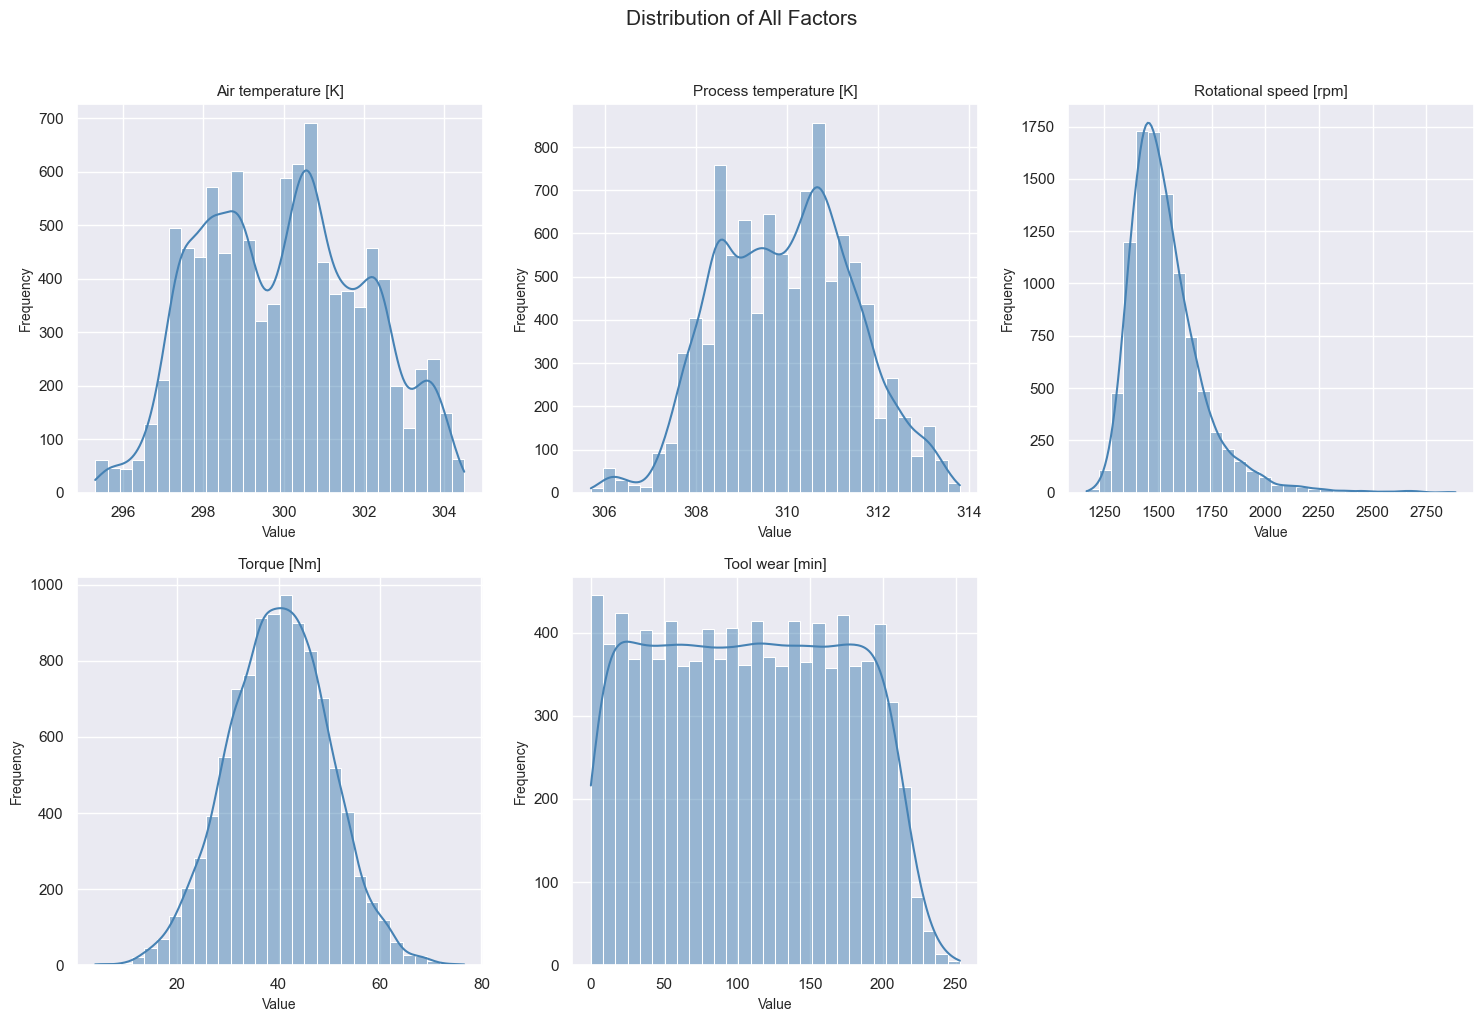

In [80]:
# -----------------------------------------------
# Step: Plot histograms for all factors
# Purpose: Visualize distribution, skewness, and
#          possible outliers for each factor.
# -----------------------------------------------

# Select all main factors (numerical variables)
factors = data[['Air temperature [K]', 
                'Process temperature [K]', 
                'Rotational speed [rpm]', 
                'Torque [Nm]', 
                'Tool wear [min]']]

# Create a grid layout for multiple histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the 2D array of axes for easier looping
axes = axes.flatten()

# Loop through each factor and plot its histogram
for i, factor in enumerate(factors):
    sns.histplot(data[factor], 
                 bins=30, 
                 kde=True, 
                 color='steelblue', 
                 ax=axes[i])
    
    # Customize subplot appearance
    axes[i].set_title(f'{factor}', fontsize=11)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused axes if any (since we created 6 subplots but have 5 factors)
if len(factors.columns) < len(axes):
    for j in range(len(factors.columns), len(axes)):
        fig.delaxes(axes[j])

# Add a single title for all subplots
plt.suptitle('Distribution of All Factors', fontsize=15, y=1.02)

# Adjust spacing for better readability
plt.tight_layout()

# Display all histograms
plt.show()


In [81]:

# Create a DataFrame to store results
summary_stats = []

# Loop through each factor column
for factor in factors.columns:
    # Central tendency
    mean_val = data[factor].mean()
    median_val = data[factor].median()
    mode_val = data[factor].mode()[0]
    
    # Distribution shape
    skewness_val = skew(data[factor])
    kurtosis_val = kurtosis(data[factor], fisher=False)  # Pearson definition (normal dist = 3)
    
    # Quartiles and whiskers
    Q1 = data[factor].quantile(0.25)
    Q3 = data[factor].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Minimum, Maximum, and Range
    min_val = data[factor].min()
    max_val = data[factor].max()
    range_val = max_val - min_val
    
    # Append all stats as one record
    summary_stats.append({
        "Factor": factor,
        "Mean": round(mean_val, 2),
        "Median": round(median_val, 2),
        "Mode": round(mode_val, 2),
        "Skewness": round(skewness_val, 3),
        "Kurtosis": round(kurtosis_val, 3),
        "Q1": round(Q1, 2),
        "Q3": round(Q3, 2),
        "IQR": round(IQR, 2),
        "Lower Whisker": round(lower_whisker, 2),
        "Upper Whisker": round(upper_whisker, 2),
        "Min": round(min_val, 2),
        "Max": round(max_val, 2),
        "Range": round(range_val, 2)
    })

# Convert list of dictionaries to DataFrame for clean display
summary_df = pd.DataFrame(summary_stats)

# Display table
summary_df


,Factor,Mean,Median,Mode,Skewness,Kurtosis,Q1,Q3,IQR,Lower Whisker,Upper Whisker,Min,Max,Range
0,Air temperature [K],300.00,300.1,300.7,0.114,2.164,298.3,301.5,3.2,293.50,306.30,295.3,304.5,9.2
1,Process temperature [K],310.01,310.1,310.6,0.015,2.500,308.8,311.1,2.3,305.35,314.55,305.7,313.8,8.1
2,Rotational speed [rpm],1538.78,1503.0,1452.0,1.993,10.389,1423.0,1612.0,189.0,1139.50,1895.50,1168.0,2886.0,1718.0
3,Torque [Nm],39.99,40.1,40.2,-0.010,2.986,33.2,46.8,13.6,12.80,67.20,3.8,76.6,72.8
4,Tool wear [min],107.95,108.0,0.0,0.027,1.833,53.0,162.0,109.0,-110.50,325.50,0.0,253.0,253.0


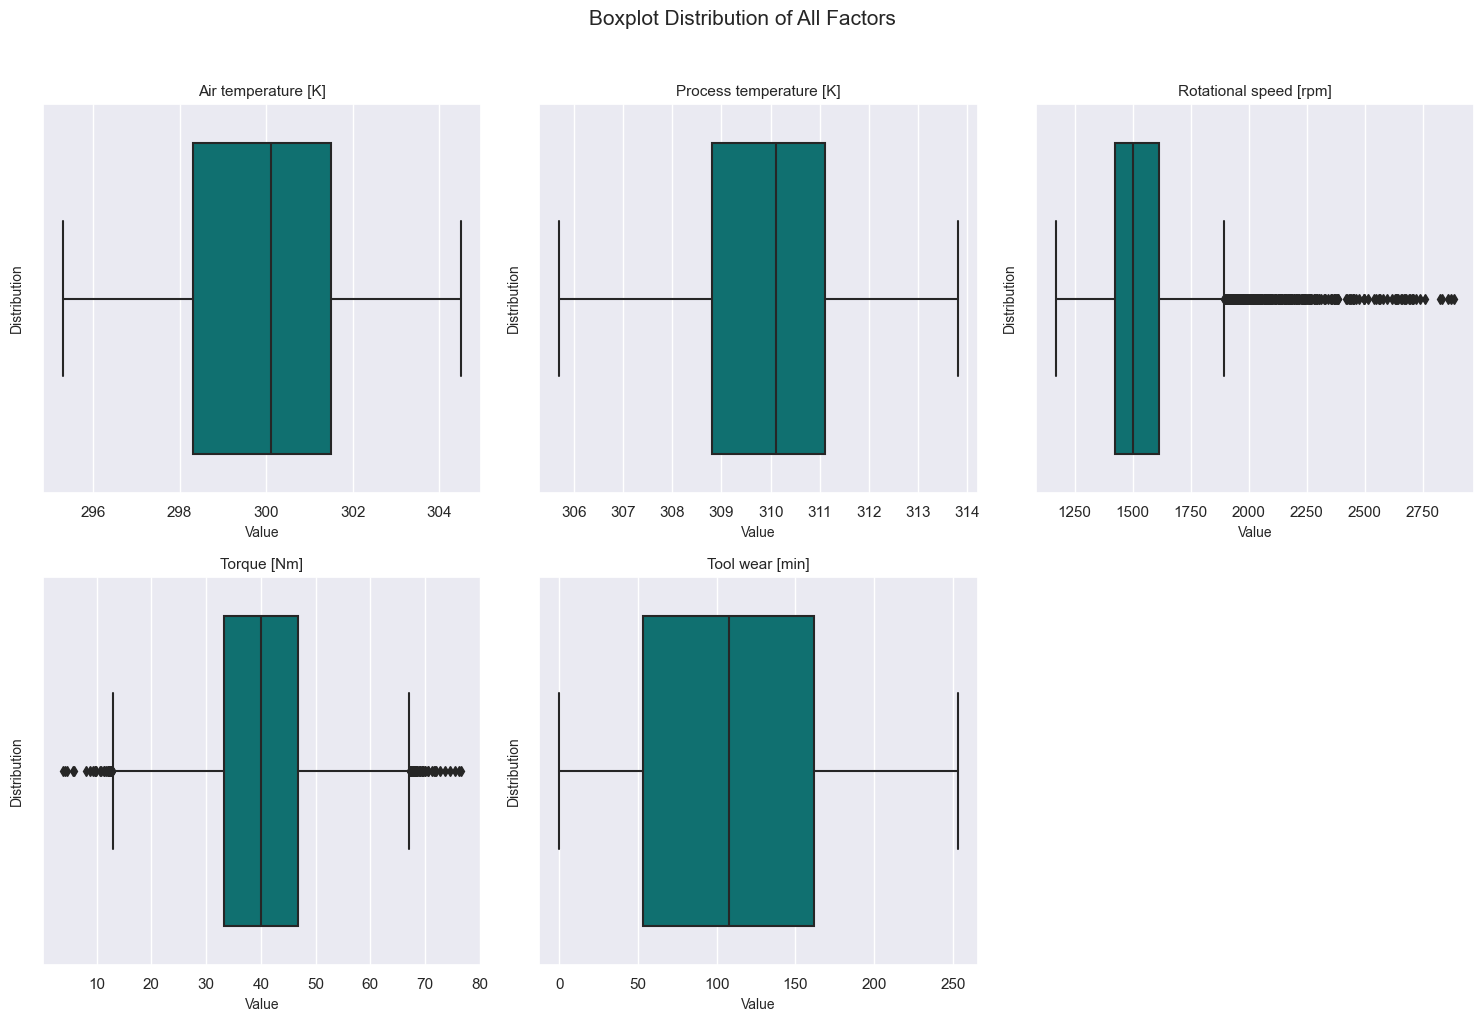

In [82]:
# ----------------------------------------------
# Visualize the Distribution of All Factors using Boxplots
# ----------------------------------------------

# Create a grid layout for displaying multiple boxplots (2 rows x 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the 2D array of subplot axes into a 1D array for easier looping
axes = axes.flatten()

# Loop through each factor and plot its boxplot
for i, factor in enumerate(factors):
    sns.boxplot(
        x=data[factor],             # Factor values to plot
        color='teal',               # Set consistent color theme
        ax=axes[i]                  # Assign each plot to its respective subplot
    )
    
    # Customize subplot appearance
    axes[i].set_title(f'{factor}', fontsize=11)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Distribution', fontsize=10)

# Remove any unused subplot axes (since we created 6 slots but have only 5 factors)
if len(factors.columns) < len(axes):
    for j in range(len(factors.columns), len(axes)):
        fig.delaxes(axes[j])

# Add an overall title for the entire figure
plt.suptitle('Boxplot Distribution of All Factors', fontsize=15, y=1.02)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display all boxplots
plt.show()


In [83]:
# Identify outliers in the "Rotational speed [rpm]" column using the calculated IQR whisker limits.
# This filters rows where the rotational speed is below the lower whisker or above the upper whisker threshold.
Rotational_speed_outliers = data[
    (data["Rotational speed [rpm]"] < summary_df["Lower Whisker"][2]) |
    (data["Rotational speed [rpm]"] > summary_df["Upper Whisker"][2])
]

# Display the detected outlier rows for further inspection.
Rotational_speed_outliers


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
14,15,L47194,L,298.6,309.2,2035,19.6,40,0,0,0,0,0,0
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
70,71,M14930,M,298.9,309.0,1924,22.6,193,0,0,0,0,0,0
101,102,L47281,L,298.8,308.8,1991,20.7,59,0,0,0,0,0,0
155,156,H29569,H,298.4,308.2,1987,19.8,198,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,9866,M24725,M,298.9,309.8,2450,13.9,89,0,0,0,0,0,0
9871,9872,M24731,M,298.9,309.8,1947,21.7,105,0,0,0,0,0,0
9886,9887,L57066,L,298.8,309.6,1903,22.3,145,0,0,0,0,0,0
9926,9927,M24786,M,298.5,308.6,1897,20.2,50,0,0,0,0,0,0


In [84]:
# Identify outliers in the "Torque [Nm]" column using the IQR-based whisker limits.
# This filters rows where the torque values fall below the lower whisker or exceed the upper whisker boundary.
Torque_speed_outliers = data[
    (data["Torque [Nm]"] < summary_df["Lower Whisker"][3]) |
    (data["Torque [Nm]"] > summary_df["Upper Whisker"][3])
]

# Display the detected outlier rows for detailed examination.
Torque_speed_outliers


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,0,0,1,0,0
463,464,L47643,L,297.4,308.7,2874,4.2,118,1,0,0,1,0,0
603,604,L47783,L,297.9,309.8,1336,71.6,31,1,0,0,1,0,0
847,848,L48027,L,296.4,307.4,2833,5.6,213,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,8308,M23167,M,298.7,310.1,1402,69.7,64,1,0,0,1,0,0
8398,8399,L55578,L,298.5,309.7,2617,12.1,102,1,0,0,1,0,0
8582,8583,M23442,M,297.5,308.1,1334,72.0,151,1,0,0,1,0,0
9084,9085,L56264,L,297.2,307.9,1326,75.4,172,1,0,0,1,1,0


### Univariate Analysis and Outlier Exploration Conclusion

From the univariate analysis, all numerical factors, **Air Temperature, Process Temperature, Rotational Speed, Torque,** and **Tool Wear**  were examined to understand their statistical distributions and ranges.

- **Air and Process Temperatures** both showed nearly symmetrical distributions with minimal skewness and kurtosis values close to 3, indicating approximately normal behavior around their means (~300 K and ~310 K respectively).
- **Rotational Speed (RPM)** displayed a right-skewed distribution with high kurtosis, reflecting that while most machines operated around 1500 rpm, a few reached much higher speeds.
- **Torque** exhibited a nearly symmetric pattern around its mean (~40 Nm), but with several extreme values at both lower and higher ends.
- **Tool Wear** values were uniformly distributed within the expected operational range, representing gradual wear progression over time.

#### Outlier Observation and Decision
Outliers were primarily observed in **Torque** (both below and above the whiskers) and **Rotational Speed (RPM)** (above the upper whisker). After close inspection, these extreme readings were **retained** rather than removed.

**Reason for Retention:**  
In predictive maintenance, such extreme operational conditions often occur **just before machine failure**. Machines tend to:
- Rotate at unusually high speeds (**RPM outliers**) when under mechanical or control stress, and  
- Experience irregular torque levels (**Torque outliers**) when components face friction, misalignment, or load imbalance.

These readings are not data errors but **real indicators of machine stress or degradation**.  
Removing them would eliminate valuable information that helps the model **learn how machines behave before failure**.

Hence, all detected outliers were **kept intentionally** for deeper relationship analysis in subsequent sections.


### Bivariate Analysis
Compare each feature with the target variable (**Machine failure**) using box plots.

- **Boxplots:** Visualize how continuous features differ between failure and non-failure cases to identify patterns or shifts in distributions.  


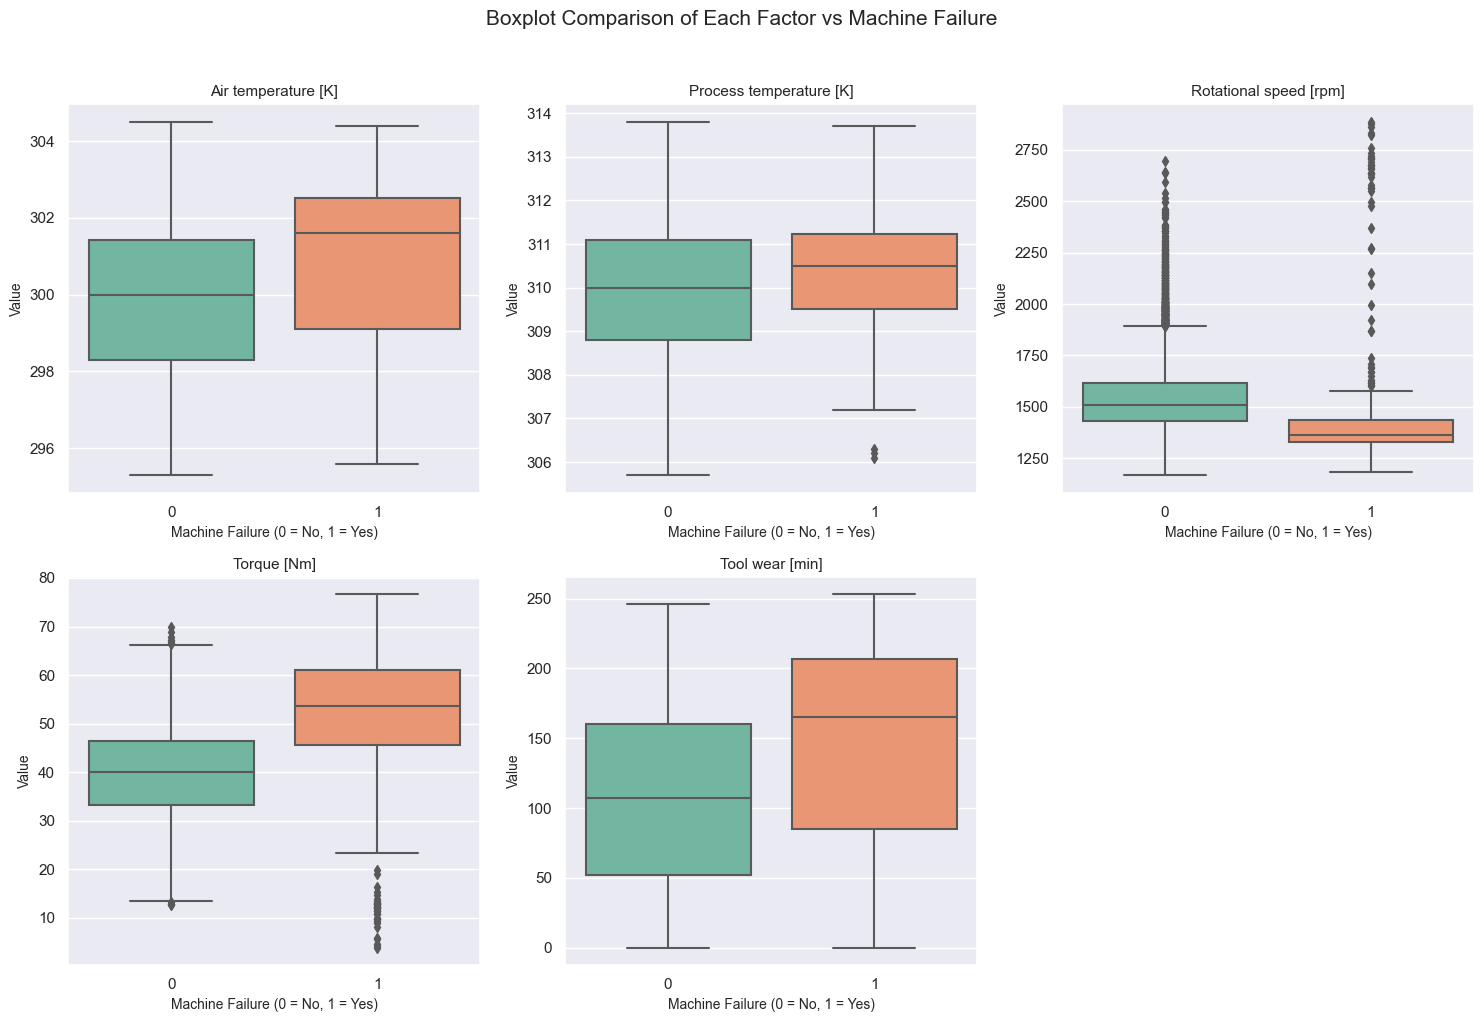

In [85]:
# -------------------------------------------------------
# Visualize Each Factor Against Machine Failure using Boxplots
# -------------------------------------------------------

# Create a grid layout for displaying multiple boxplots (2 rows x 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the 2D array of subplot axes into a 1D array for easier iteration
axes = axes.flatten()

# Loop through each factor and plot its boxplot grouped by Machine Failure
for i, factor in enumerate(factors):
    sns.boxplot(
        data=data,
        x="Machine failure",     # Categorical target variable (0 = No, 1 = Yes)
        y=factor,                # Continuous feature to compare
        palette="Set2",
        ax=axes[i]
    )
    
    # Customize subplot appearance
    axes[i].set_title(f'{factor}', fontsize=11)
    axes[i].set_xlabel('Machine Failure (0 = No, 1 = Yes)', fontsize=10)
    axes[i].set_ylabel('Value', fontsize=10)

# Remove any unused subplot axes (since we created 6 slots but have only 5 factors)
if len(factors.columns) < len(axes):
    for j in range(len(factors.columns), len(axes)):
        fig.delaxes(axes[j])

# Add an overall title for all boxplots
plt.suptitle('Boxplot Comparison of Each Factor vs Machine Failure', fontsize=15, y=1.02)

# Adjust spacing between subplots for clear visualization
plt.tight_layout()

# Display the boxplots
plt.show()


### Bivariate Analysis: Feature Relationship with Machine Failure Conclusion

This section examines how each continuous factor varies between failed and non-failed machine instances.

**Key Observations:**
- **Air Temperature [K]:** Machines that failed generally operated at slightly higher air temperatures. Although the difference is not extreme, it indicates that elevated ambient temperature could contribute to failure.
- **Process Temperature [K]:** Failed machines tend to show slightly higher process temperatures compared to non-failed ones, implying potential thermal stress or overheating in the system.
- **Rotational Speed [rpm]:** Machines that failed often operated at relatively lower speeds but show many outliers at higher RPMs. These may represent extreme operational loads or transitional stress periods before failure.
- **Torque [Nm]:** A noticeable increase in torque is observed among failed machines, suggesting higher mechanical stress or resistance that could accelerate wear and damage.
- **Tool Wear [min]:** Failed machines exhibit higher tool wear values on average, reinforcing the idea that mechanical degradation and prolonged operation contribute to failure likelihood.

**Therefore:**
The bivariate exploration reveals that operational stress indicators—such as **high temperature, torque, and tool wear** are strongly associated with machine failure.  
These variables likely capture early warning signs of mechanical or thermal strain, making them valuable predictors for the upcoming modeling phase.


### Correlation Analysis
Investigate the relationships among numerical and failure-related variables.

- Compute the full correlation matrix using .  
- Visualize the correlation matrix with a heatmap:  


In [86]:
# "Compute the correlation matrix between failure types and continuous operational parameters."
# "This helps identify how different factors (temperature, speed, torque, tool wear)"
# "are related to each other and to specific failure categories."
# "A strong positive or negative correlation indicates that a variable"
# "may have a meaningful relationship with certain machine failure modes."

Correlation_Matrix = data[["TWF","HDF","PWF","OSF","RNF",
                           "Air temperature [K]", 
                           "Process temperature [K]", 
                           "Rotational speed [rpm]", 
                           "Torque [Nm]", 
                           "Tool wear [min]"]].corr()

#Display the correlation matrix
Correlation_Matrix


,TWF,HDF,PWF,OSF,RNF,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
TWF,1.000000,-0.007332,0.008577,0.038243,0.030970,0.009955,0.007315,0.010389,-0.014662,0.115792
HDF,-0.007332,1.000000,0.018443,0.046396,-0.004706,0.137831,0.056933,-0.121241,0.142610,-0.001287
PWF,0.008577,0.018443,1.000000,0.115836,-0.004273,0.003470,-0.003355,0.123018,0.083781,-0.009334
OSF,0.038243,0.046396,0.115836,1.000000,-0.004341,0.001988,0.004554,-0.104575,0.183465,0.155894
RNF,0.030970,-0.004706,-0.004273,-0.004341,1.000000,0.017688,0.022279,-0.013088,0.016136,0.011326
Air temperature [K],0.009955,0.137831,0.003470,0.001988,0.017688,1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.007315,0.056933,-0.003355,0.004554,0.022279,0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.010389,-0.121241,0.123018,-0.104575,-0.013088,0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.014662,0.142610,0.083781,0.183465,0.016136,-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.115792,-0.001287,-0.009334,0.155894,0.011326,0.013853,0.013488,0.000223,-0.003093,1.000000


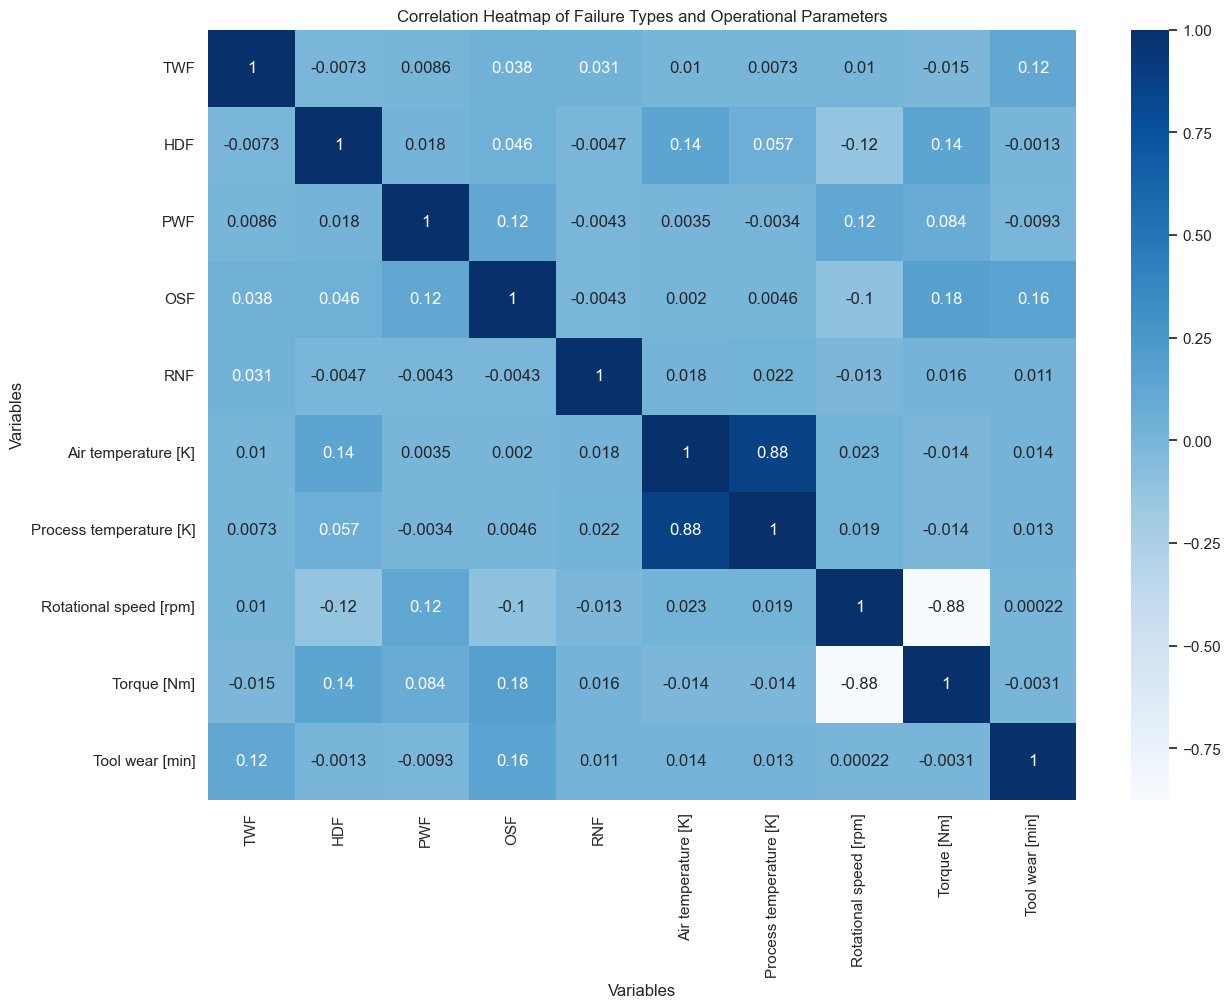

In [87]:
# "Visualize the correlation matrix using a heatmap for better interpretability."
# "This heatmap helps quickly identify strong or weak relationships between variables."
# "Darker shades represent stronger correlations (positive or negative)."
# "Annotations display the exact correlation coefficient values for clarity."

plt.figure(figsize=(14,10))  # "Set the figure size for better visibility."
sns.heatmap(Correlation_Matrix, annot=True, cmap="Blues")  # "Generate the heatmap with correlation values annotated."

plt.title("Correlation Heatmap of Failure Types and Operational Parameters")  # "Add a descriptive title."
plt.xlabel("Variables")  # "Label the X-axis."
plt.ylabel("Variables")  # "Label the Y-axis."

plt.show()  # "Display the heatmap."


### Correlation Analysis Conclusion

The correlation matrix shows how each operational and failure-related feature interacts within the machine system.  

- **High correlation:**  
  - A very strong positive correlation (**0.876**) was observed between **Air temperature [K]** and **Process temperature [K]**, indicating that as the air temperature rises, the process temperature tends to increase proportionally.  
  - **Rotational speed [rpm]** and **Torque [Nm]** exhibit a strong negative correlation (**-0.875**), suggesting that higher torque values generally occur at lower rotational speeds, a mechanical balance typical in rotating machinery.

- **Moderate correlation:**  
  - **Tool wear [min]** shows a mild positive relationship with **OSF (Overstrain Failure)** (**0.156**) and **TWF (Tool Wear Failure)** (**0.116**), confirming that higher wear time contributes to these specific failure types.  

- **Weak or no correlation:**  
  - Most failure categories (TWF, HDF, PWF, OSF, RNF) have weak or near-zero correlations with operational features like temperature and speed. This implies that **failures are not linearly driven by individual parameters** but may depend on complex multivariate or non-linear patterns.  

**Summary:**  
The correlation analysis confirms that while a few mechanical and thermal variables are closely linked, most failure events cannot be explained by single-variable relationships. This supports the need for **machine learning models** that can capture these hidden non-linear interactions for accurate failure prediction.


## Feature Engineering

Feature engineering is a crucial step that transforms raw sensor readings into more meaningful variables, enabling the predictive model to capture deeper operational patterns.  
In this phase, new features are derived from existing process parameters to enhance the representation of machine behavior and improve model interpretability.

### Objectives
- To **create derived variables** that capture hidden relationships among operational factors.  
- To **enhance feature relevance** for predicting machine failure.  
- To **reduce redundancy** and simplify model learning by eliminating highly correlated or non-informative features.

### Created Features
1. **Temp_Diff** = Process temperature − Air temperature  
   - Captures the temperature gradient between the machine and its environment, reflecting thermal stress conditions.  

2. **Power** = Torque × Rotational speed  
   - Represents total mechanical output, providing insight into machine workload intensity.  

3. **Torque_Speed_Ratio** = Torque / Rotational speed  
   - Describes torque efficiency relative to speed, indicating mechanical balance and efficiency stability.  

### Redundancy Check and Feature Selection
A correlation analysis and heatmap visualization will be performed among operational features (**Torque**, **Rotational speed**, **Temp_Diff**, **Power**, and **Torque_Speed_Ratio**) to identify potential redundancy.  
Non-informative or constant columns such as **`Product ID`** and **`UDI`** will also be dropped before modeling to ensure clean, relevant input features.


In [88]:
# Create new engineered features to improve model performance

# Compute temperature difference between process and air temperatures
data['Temp_Diff'] = data['Process temperature [K]'] - data['Air temperature [K]']

# Compute torque-to-speed ratio to capture machine load behavior
data['Torque_Speed_Ratio'] = data['Torque [Nm]'] / data['Rotational speed [rpm]']

# Compute power as a product of torque and rotational speed
data["Power"] = data['Torque [Nm]'] * data['Rotational speed [rpm]']

# Display the first few rows to confirm new features were added correctly
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Diff,Torque_Speed_Ratio,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,0.027595,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,0.032884,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,0.032977,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,0.027565,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,0.028409,56320.0


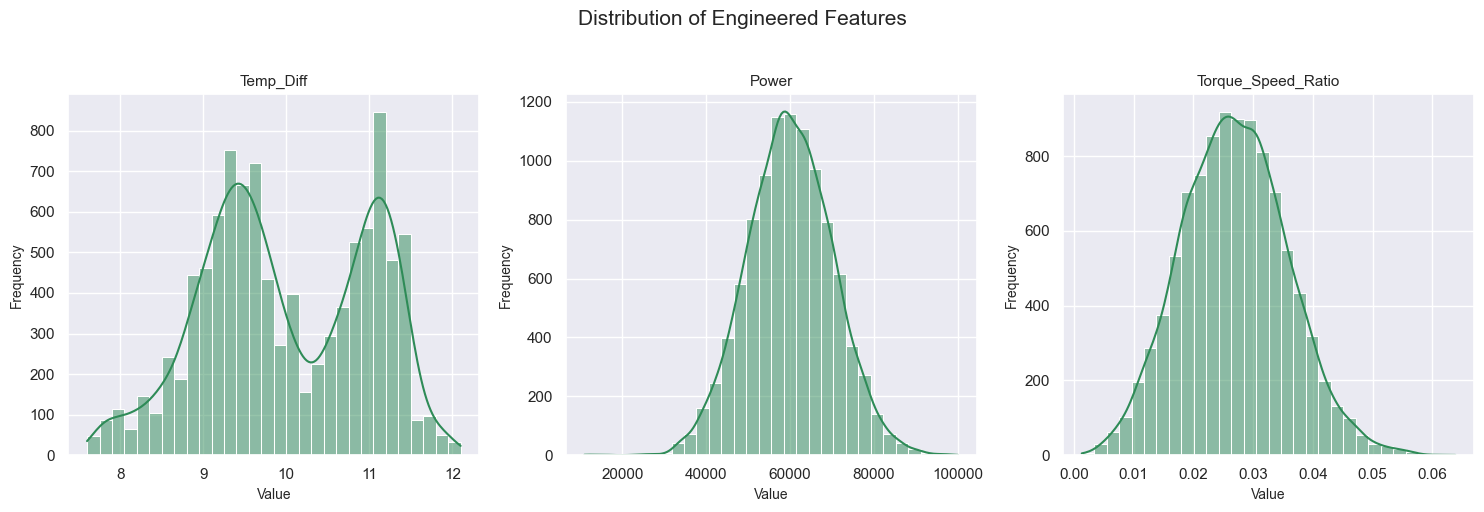

In [89]:
# -----------------------------------------------
# Step: Plot histograms for engineered features
# Purpose: Visualize distribution, skewness.
# -----------------------------------------------

# Select engineered features
engineered_features = ["Temp_Diff", "Power", "Torque_Speed_Ratio"]

# Create a grid layout for multiple histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Flatten the 2D array of axes for easier looping
axes = axes.flatten()

# Loop through each engineered feature and plot its histogram
for i, feature in enumerate(engineered_features):
    sns.histplot(data[feature],
                 bins=30,
                 kde=True,
                 color='seagreen',
                 ax=axes[i])
    
    # Customize subplot appearance
    axes[i].set_title(f'{feature}', fontsize=11)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Add a single title for all subplots
plt.suptitle('Distribution of Engineered Features', fontsize=15, y=1.02)

# Adjust spacing for better readability
plt.tight_layout()

# Display all histograms
plt.show()


In [90]:
# ---------------------------------------------------
# Summary Statistics for Engineered Features
# ---------------------------------------------------

# Define engineered feature columns
engineered_features = ["Temp_Diff", "Power", "Torque_Speed_Ratio"]

# Create a list to store results
engineered_summary_stats = []

# Loop through each engineered feature
for feature in engineered_features:
    # Central tendency
    mean_val = data[feature].mean()
    median_val = data[feature].median()
    mode_val = data[feature].mode()[0]
    
    # Distribution shape
    skewness_val = skew(data[feature])
    kurtosis_val = kurtosis(data[feature], fisher=False)  # Pearson definition (normal dist = 3)
    
    # Quartiles and whiskers
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Minimum, Maximum, and Range
    min_val = data[feature].min()
    max_val = data[feature].max()
    range_val = max_val - min_val
    
    # Append all stats as one record
    engineered_summary_stats.append({
        "Feature": feature,
        "Mean": round(mean_val, 2),
        "Median": round(median_val, 2),
        "Mode": round(mode_val, 2),
        "Skewness": round(skewness_val, 3),
        "Kurtosis": round(kurtosis_val, 3),
        "Q1": round(Q1, 2),
        "Q3": round(Q3, 2),
        "IQR": round(IQR, 2),
        "Lower Whisker": round(lower_whisker, 2),
        "Upper Whisker": round(upper_whisker, 2),
        "Min": round(min_val, 2),
        "Max": round(max_val, 2),
        "Range": round(range_val, 2)
    })

# Convert list of dictionaries to DataFrame for clean display
engineered_summary_df = pd.DataFrame(engineered_summary_stats)

# Display summary statistics for engineered features
engineered_summary_df


,Feature,Mean,Median,Mode,Skewness,Kurtosis,Q1,Q3,IQR,Lower Whisker,Upper Whisker,Min,Max,Range
0,Temp_Diff,10.00,9.80,9.50,-0.072,2.014,9.30,11.00,1.70,6.75,13.55,7.6,12.10,4.50
1,Power,59967.15,59883.90,62622.00,0.008,3.157,53105.40,66873.75,13768.35,32452.88,87526.28,10966.8,99980.40,89013.60
2,Torque_Speed_Ratio,0.03,0.03,0.03,0.166,2.965,0.02,0.03,0.01,0.00,0.05,0.0,0.06,0.06


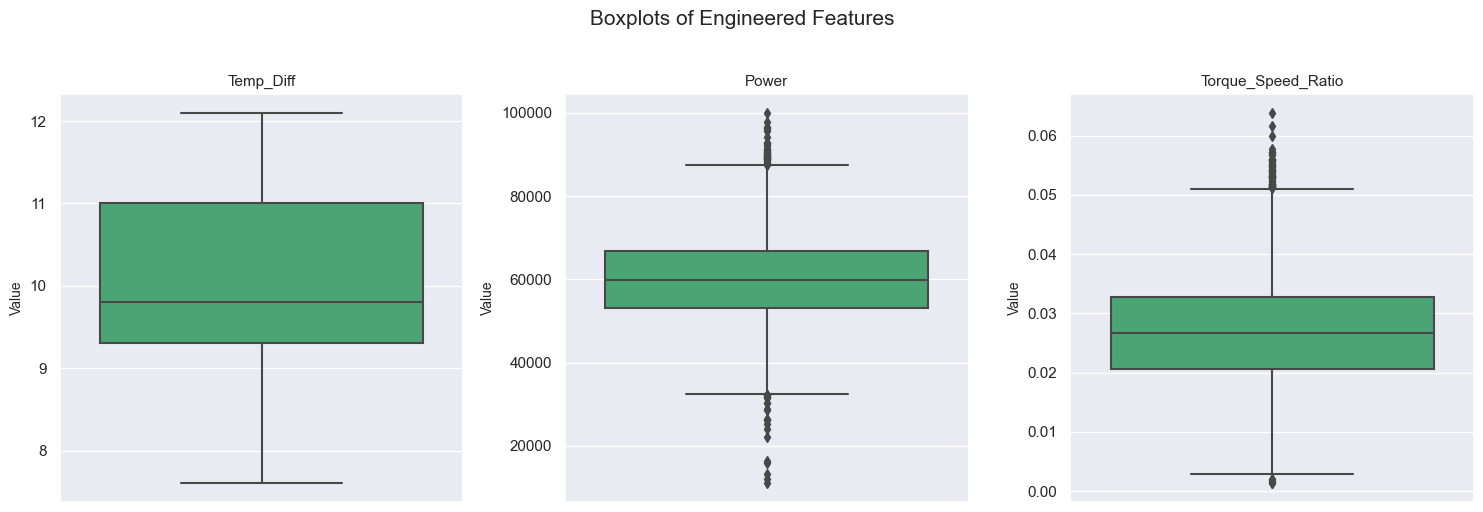

In [91]:
# -----------------------------------------------
# Step: Visualize Engineered Feature Distributions
# Purpose: Examine spread, central tendency,
#          and detect possible outliers using boxplots.
# -----------------------------------------------

# Define engineered features to visualize
engineered_features = ["Temp_Diff", "Power", "Torque_Speed_Ratio"]

# Create a grid layout for multiple boxplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Flatten the 2D array of axes for easier looping
axes = axes.flatten()

# Loop through each engineered feature and plot its boxplot
for i, feature in enumerate(engineered_features):
    sns.boxplot(y=data[feature],
                color='mediumseagreen',
                ax=axes[i])
    
    # Customize subplot appearance
    axes[i].set_title(f'{feature}', fontsize=11)
    axes[i].set_xlabel('')  # No x-label needed for boxplots
    axes[i].set_ylabel('Value', fontsize=10)

# Add a single title for all subplots
plt.suptitle('Boxplots of Engineered Features', fontsize=15, y=1.02)

# Adjust spacing for better readability
plt.tight_layout()

# Display all boxplots
plt.show()


In [92]:
# Compute the correlation matrix for selected numerical features related to machine operation.
# This helps identify strong linear relationships and potential redundancy among Torque, Speed, Power, and derived features.

corr_matrix = data[["Torque [Nm]", "Rotational speed [rpm]", "Temp_Diff", "Power", "Torque_Speed_Ratio"]].corr()

# Display the correlation matrix
corr_matrix

,Torque [Nm],Rotational speed [rpm],Temp_Diff,Power,Torque_Speed_Ratio
Torque [Nm],1.000000,-0.875027,0.006690,0.978828,0.993009
Rotational speed [rpm],-0.875027,1.000000,-0.016727,-0.805584,-0.882857
Temp_Diff,0.006690,-0.016727,1.000000,0.006694,0.005578
Power,0.978828,-0.805584,0.006694,1.000000,0.949075
Torque_Speed_Ratio,0.993009,-0.882857,0.005578,0.949075,1.000000


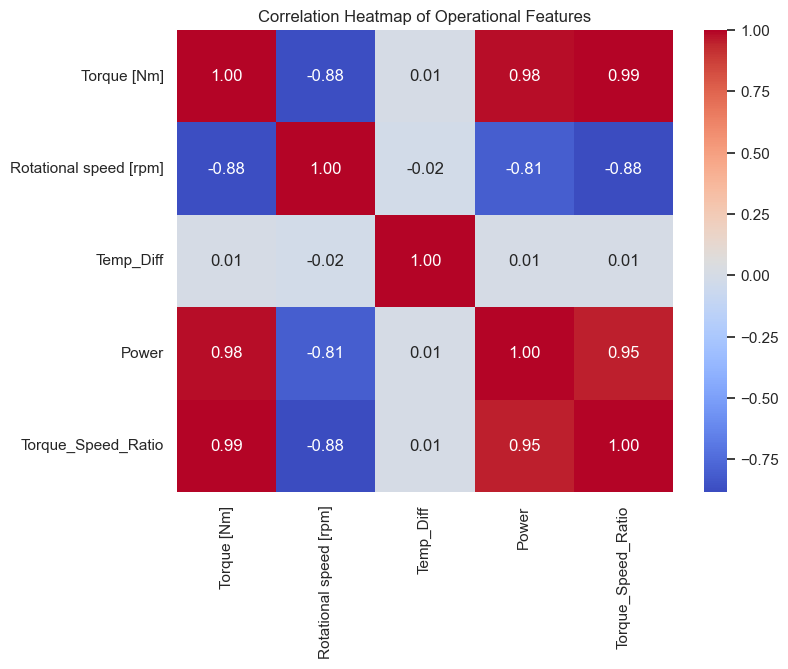

In [93]:
# Set figure size for the heatmap
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix with annotated values
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add a title for clarity
plt.title("Correlation Heatmap of Operational Features")

# Display the plot
plt.show()


In [94]:
# Drop constant and redundant columns: 'Product ID', 'UDI', and 'Torque_Speed_Ratio'
# These features add no predictive value or are highly correlated with others.

data = data.drop(columns = ["Product ID", "UDI", "Torque_Speed_Ratio","TWF","HDF","PWF","OSF","RNF"])

# Display the first few rows to verify that the specified columns were successfully dropped

data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_Diff,Power
0,M,298.1,308.6,1551,42.8,0,0,10.5,66382.8
1,L,298.2,308.7,1408,46.3,3,0,10.5,65190.4
2,L,298.1,308.5,1498,49.4,5,0,10.4,74001.2
3,L,298.2,308.6,1433,39.5,7,0,10.4,56603.5
4,L,298.2,308.7,1408,40.0,9,0,10.5,56320.0


### Feature Engineering Conclusion

The engineered features provide meaningful extensions of the original parameters:
- **Temp_Diff** captures the thermal dynamics between air and process systems.  
- **Power** effectively represents combined torque–speed interactions, showing operational intensity.  
- **Torque_Speed_Ratio** highlights mechanical balance and efficiency stability, but is almost perfectly correlated with **Torque** (correlation = 0.993).  
  - Due to this high redundancy, **Torque_Speed_Ratio** can be safely dropped without losing information.  

Additionally, the columns **`Product ID`** and **`UDI`** are constant or non-informative identifiers.  
They do not contribute to the predictive modeling process and will therefore be **dropped**.

A **correlation heatmap** was plotted to visualize relationships among key operational features.  
It confirmed strong dependencies between **Torque**, **Power**, and **Torque_Speed_Ratio**, validating the redundancy decision.

Outliers in **Power** and **Torque_Speed_Ratio** correspond to those previously observed in torque and rotational speed, indicating **genuine operational anomalies** rather than data errors.  

Overall, these engineered features are **statistically sound**, free of redundancy, and ready for scaling or normalization before modeling.

## Feature Encoding and Scaling  

Before modeling, it is essential to prepare the dataset through **encoding** and **scaling** to ensure compatibility and balanced feature influence.  

### Feature Encoding  
- The categorical variable **`Type`** will be **encoded using Label Encoding**, converting machine types (e.g., L, M, H) into numerical values.  
- This approach is appropriate since the categories represent **machine variants** rather than ordinal relationships.  

### Feature Scaling  
- Continuous features such as **Torque**, **Rotational speed**, **Temperatures**, and **Power** will be **standardized** using `StandardScaler`.  
- Scaling ensures all features are on a similar scale, improving model convergence and preventing bias toward high-magnitude variables.  

### Expected Outcome  
After this step:  
- The dataset will be fully numerical and normalized.  
- All features will contribute proportionally during model training.  
- The data will be ready for **splitting and modeling**.  


### Feature Encoding  
- The categorical variable **`Type`** will be **encoded using Label Encoding**, converting machine types (e.g., L, M, H) into numerical values.  
- This approach is appropriate since the categories represent **machine variants** rather than ordinal relationships.  


In [95]:
# Select only categorical columns (object datatype)
cat_cols = data.select_dtypes("object").columns.to_list()

# Display the list of identified categorical columns
cat_cols


['Type']

In [96]:
# Loop through each categorical column
for col in cat_cols:
    # Create a LabelEncoder instance
    le = LabelEncoder()
    # Transform categorical values into numeric labels
    data[col] = le.fit_transform(data[col])

In [97]:
# Check the updated dataset information to confirm all columns are now numeric

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int32  
 7   Temp_Diff                10000 non-null  float64
 8   Power                    10000 non-null  float64
dtypes: float64(5), int32(2), int64(2)
memory usage: 625.1 KB


In [98]:
# Display the first few rows to verify the encoding results

data.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_Diff,Power
0,2,298.1,308.6,1551,42.8,0,0,10.5,66382.8
1,1,298.2,308.7,1408,46.3,3,0,10.5,65190.4
2,1,298.1,308.5,1498,49.4,5,0,10.4,74001.2
3,1,298.2,308.6,1433,39.5,7,0,10.4,56603.5
4,1,298.2,308.7,1408,40.0,9,0,10.5,56320.0


In [99]:
# ----------------------------------------------------------
# Step: Separate Features (X) from Target Variable (y)
# Purpose: Prepare independent variables for modeling
# ----------------------------------------------------------

# Drop the target column "Machine failure" to isolate all predictor features

X = data.drop(columns = "Machine failure")

# Display the first few rows of the feature dataset to confirm separation

X.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temp_Diff,Power
0,2,298.1,308.6,1551,42.8,0,10.5,66382.8
1,1,298.2,308.7,1408,46.3,3,10.5,65190.4
2,1,298.1,308.5,1498,49.4,5,10.4,74001.2
3,1,298.2,308.6,1433,39.5,7,10.4,56603.5
4,1,298.2,308.7,1408,40.0,9,10.5,56320.0


In [100]:
# ----------------------------------------------------------
# Step: Define Target Variable (y)
# Purpose: Extract the dependent variable for prediction
# ----------------------------------------------------------

# Select the target column "Machine failure" from the dataset

y = data["Machine failure"]

# Display sample values to verify correct extraction

y.head()


0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int32

### Feature Scaling  
- Continuous features such as **Torque**, **Rotational speed**, **Temperatures**, and **Power** will be **standardized** using `StandardScaler`.  
- Scaling ensures all features are on a similar scale, improving model convergence and preventing bias toward high-magnitude variables.  


In [101]:
# ----------------------------------------------------------
# Step: Feature Scaling
# Purpose: Normalize feature values to ensure that all 
#          numerical variables contribute equally to the model.
# ----------------------------------------------------------

# Initialize the StandardScaler

scale = StandardScaler()

# Fit the scaler on the feature dataset (X) and transform it
# This standardizes each feature to have mean = 0 and std = 1

scaledX = scale.fit_transform(X)

# Display the scaled feature array

scaledX


array([[ 1.33388944, -0.95238944, -0.94735989, ..., -1.69598374,
         0.49884932,  0.62944321],
       [-0.33222278, -0.90239341, -0.879959  , ..., -1.6488517 ,
         0.49884932,  0.5124562 ],
       [-0.33222278, -0.95238944, -1.01476077, ..., -1.61743034,
         0.39895359,  1.3768886 ],
       ...,
       [ 1.33388944, -0.50242514, -0.94735989, ..., -1.35034876,
        -0.40021228, -0.49292181],
       [-1.998335  , -0.50242514, -0.879959  , ..., -1.30321671,
        -0.30031654,  0.81636343],
       [ 1.33388944, -0.50242514, -0.879959  , ..., -1.22466331,
        -0.30031654,  0.03265639]])

## Feature Encoding and Scaling – Conclusion

The categorical feature **“Type”** was successfully encoded into numerical form, ensuring that the model can interpret it effectively.  
All continuous variables were then standardized using **StandardScaler**, transforming them to have a mean of 0 and a standard deviation of 1.

This process ensures that:  
- The encoded “Type” feature contributes meaningfully during model training.  
- Continuous features are on the same scale, preventing bias in algorithms sensitive to magnitude.  
- Model training becomes more stable and efficient, improving performance and interpretability.

With encoding and scaling completed, the dataset is now fully ready for the **model building phase**.


## Train–Test Split

**Goal:** Prepare the dataset for model training and evaluation.

### Tasks:
- Split the dataset into training and testing sets (e.g., 80% train, 20% test).
- Use **stratified sampling** to maintain the same proportion of failure vs. non-failure cases in both subsets.
- Verify the shape of each split to confirm successful separation.

In [102]:
# Split data into 80% training and 20% testing sets
# Using stratify=y to preserve the proportion of machine failures

X_train, X_test, y_train,y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 4)

# Display the shape of each subset to confirm successful split

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (8000, 8)
Testing set shape: (2000, 8)
Training labels shape: (8000,)
Testing labels shape: (2000,)


## Train–Test Split – Conclusion

The dataset was successfully divided into **80% training data** and **20% testing data** using stratified sampling.  
This approach ensures that the **ratio of machine failure to non-failure** cases remains consistent across both subsets.  

The split prepares the dataset for model development, allowing the training set to be used for learning patterns,  
while the test set serves as an unbiased dataset for evaluating model performance.


## Model Building and Evaluation

### Goal:
Train and compare different machine learning algorithms to effectively predict **Machine Failure**.

### Models Explored:
- Logistic Regression  
- Support Vector Machine (RBF Kernel)  
- K-Nearest Neighbors (KNN)  
- Decision Tree  
- Random Forest  
- XGBoost  
- LightGBM  
- CatBoost  

### Approach:
- Used `X_train`, `X_test`, `y_train`, and `y_test` for model training and testing.  
- Implemented a **loop-based training pipeline** that:
  - Fits each model on the training data.  
  - Generates predictions on the test data.  
  - Calculates key performance metrics — Accuracy, Precision, Recall, F1-Score, and ROC-AUC.  
  - Stores all metric results in a **DataFrame** for comparison.  
- Plotted **confusion matrices** for each model to visualize true and false predictions.


In [103]:
# ----------------------------------------------------------
# Step: Train and Evaluate Multiple Machine Learning Models
# Purpose: Compare performance of various algorithms on the 
#          Predictive Maintenance dataset.
# ----------------------------------------------------------

# Define all models with key parameters
models = {
    "SVM (RBF Kernel)": SVC(kernel="rbf", random_state=5),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=5),
    "Decision Tree": DecisionTreeClassifier(random_state=5),
    "Random Forest": RandomForestClassifier(random_state=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=5),
    "LightGBM": LGBMClassifier(random_state=5, verbose=0),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=5)
}

# Data: Use scaled features (X_train, X_test) and labels (y_train, y_test)
results = []

# Train and evaluate each model
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv= 7, scoring ="f1")
    print (score)
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    })
# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Display model performance table
results_df


[0.43636364 0.36       0.43137255 0.35294118 0.49122807 0.51724138
 0.49056604]
[0.4        0.21276596 0.5        0.45614035 0.48148148 0.5
 0.36      ]
[0.2745098  0.24489796 0.32653061 0.16326531 0.42857143 0.37037037
 0.39215686]
[0.65714286 0.78378378 0.7654321  0.77108434 0.72527473 0.65853659
 0.65822785]
[0.75       0.7761194  0.85714286 0.8115942  0.84931507 0.7826087
 0.74285714]
[0.72222222 0.68493151 0.80555556 0.77333333 0.7654321  0.7027027
 0.75324675]
[0.73529412 0.8        0.81690141 0.85333333 0.78947368 0.71428571
 0.8       ]
[0.77142857 0.73239437 0.81081081 0.80555556 0.7654321  0.73529412
 0.76712329]


,Model,Accuracy,Precision,Recall,F1-Score
6,LightGBM,0.9925,0.9818,0.7941,0.8780
4,Random Forest,0.9925,1.0000,0.7794,0.8760
7,CatBoost,0.9920,0.9333,0.8235,0.8750
5,XGBoost,0.9915,0.9322,0.8088,0.8661
3,Decision Tree,0.9850,0.7714,0.7941,0.7826
1,K-Nearest Neighbors,0.9780,0.8750,0.4118,0.5600
0,SVM (RBF Kernel),0.9770,0.9231,0.3529,0.5106
2,Logistic Regression,0.9730,0.8500,0.2500,0.3864


[[1930    2]
 [  44   24]]
[[1928    4]
 [  40   28]]
[[1929    3]
 [  51   17]]
[[1916   16]
 [  14   54]]
[[1932    0]
 [  15   53]]
[[1928    4]
 [  13   55]]
[[1931    1]
 [  14   54]]
[[1928    4]
 [  12   56]]


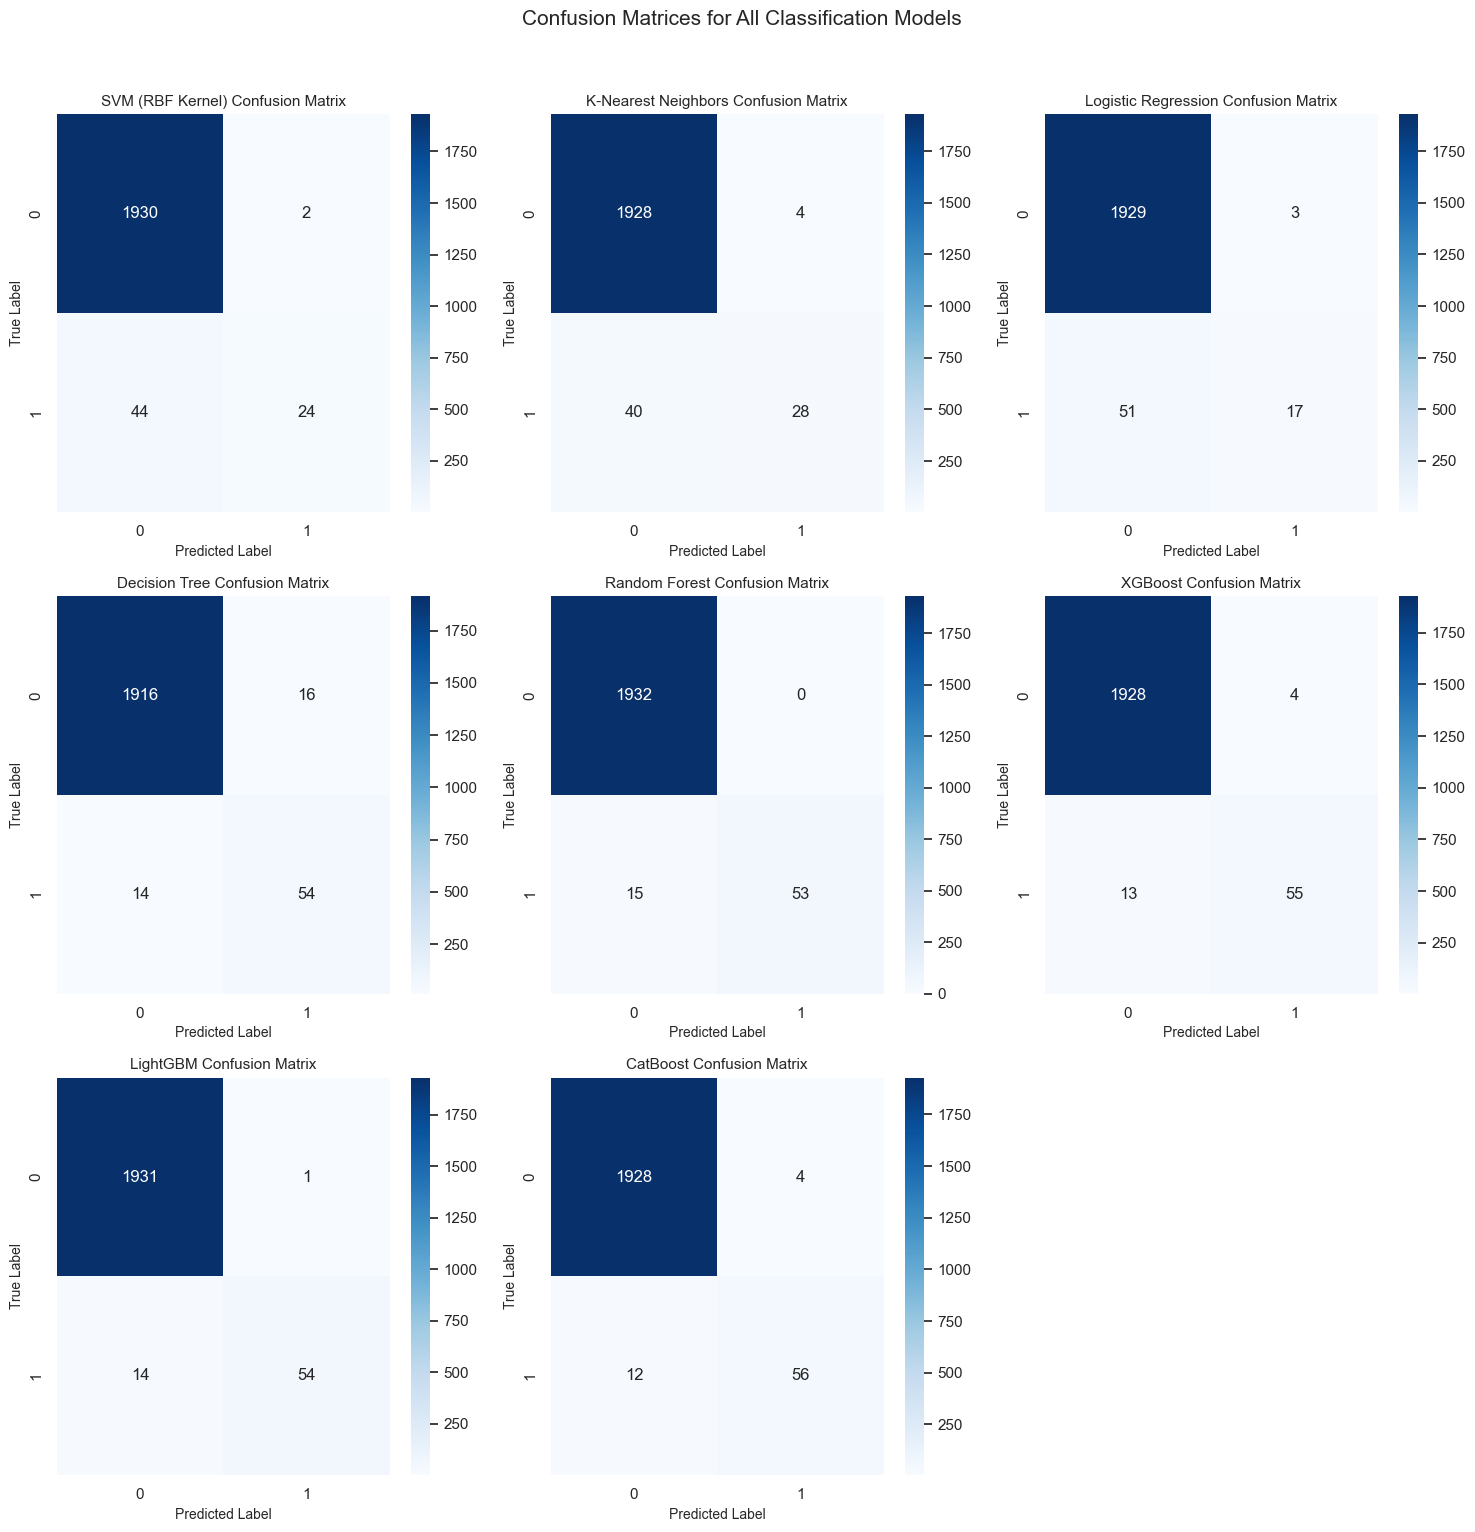

In [104]:
# -----------------------------------------------
# Step: Plot Confusion Matrices for All Models
# Purpose: Visually compare classification performance
#          of different models using confusion matrices.
# -----------------------------------------------

# Create a 4x2 grid layout (8 subplots total)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the 2D array of axes for easier looping
axes = axes.flatten()

# Loop through each model, generate predictions, and plot confusion matrix
for i, (name, model) in enumerate(models.items()):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print (cm)
    # Plot confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=axes[i])
    
    # Customize subplot appearance
    axes[i].set_title(f'{name} Confusion Matrix', fontsize=11)
    axes[i].set_xlabel('Predicted Label', fontsize=10)
    axes[i].set_ylabel('True Label', fontsize=10)
    # Remove any unused subplot axes (since we created 9 slots but have only 8 models)
if len(list(models.items())) < len(axes):
    for j in range(len(list(models.items())), len(axes)):
        fig.delaxes(axes[j])


# Add a single title for all subplots
plt.suptitle('Confusion Matrices for All Classification Models', fontsize=15, y=1.02)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display all confusion matrices
plt.show()


## Model Building and Evaluation Conclusion

After training eight machine learning models  **Logistic Regression**, **SVM (RBF Kernel)**, **K-Nearest Neighbors**, **Decision Tree**, **Random Forest**, **XGBoost**, **LightGBM**, and **CatBoost**, their performances were compared using key metrics such as **Accuracy**, **Precision**, **Recall**, and **F1-Score**, along with confusion matrix analysis.

### Interpretation of Results

All models achieved very high **True Negatives (≈1928–1932)**, meaning they accurately identified most healthy machines.  
However, variations appeared in the **False Negatives** (missed failures):  
- **SVM**, **KNN**, and **Logistic Regression** missed several actual failures, showing weaker detection of subtle fault patterns.  
- **Tree-based models** including **Decision Tree**, **Random Forest**, **XGBoost**, **LightGBM**, and **CatBoost** showed stronger failure detection, with fewer missed cases and more stable results.  
- Among them, **LightGBM**, **CatBoost**, and **Random Forest** demonstrated the most consistent and balanced performance.

### Key Insights

While **accuracy** was high for all models, it is not a reliable indicator in imbalanced datasets.  
The **Recall** metric is more critical in predictive maintenance because missing a real failure (False Negative) can lead to costly downtime or damage.  
**LightGBM** achieved an excellent balance with high recall (≈79%) and precision (≈98%).  
**CatBoost** slightly improved recall but with a small trade-off in precision.  
**Random Forest** achieved perfect precision (no false alarms) but slightly lower recall.  
Simpler models such as **Logistic Regression** and **KNN** struggled due to the **non-linear relationships** in the data.

### Conclusion

The **tree-based ensemble models**, particularly **LightGBM**, **CatBoost**, and **Random Forest**, emerged as the most effective algorithms for predicting machine failure.  
Among these, **LightGBM** stands out as the **best-performing model**, offering:

- High accuracy (99.25%)  
- Strong precision (98%)  
- Solid recall (79%)  
- The highest overall F1-Score (0.878)  

This demonstrates that **LightGBM** provides a robust and generalizable predictive maintenance solution, capable of accurately recognizing machine failure patterns while minimizing false alarms.


###  Model Optimization

Since the best-performing model so far is the **LightGBM Classifier**, based on its higher **F1 Score**, I proceeded to optimize it by tuning key hyperparameters using **RandomizedSearchCV**.

Unlike GridSearchCV, which exhaustively searches through all possible parameter combinations, **RandomizedSearchCV** samples a limited number of random combinations from the parameter space. This makes it significantly **faster and more computationally efficient**, especially for models like LightGBM that can take longer to train when exploring large grids.

This approach helps  identify a near-optimal configuration of parameters such as `num_leaves`, `max_depth`, `learning_rate`, and `n_estimators`, while reducing computation time. The resulting model achieves improved performance and better generalization on unseen data.


In [105]:

# Base model
lgbm = LGBMClassifier(random_state=5)

# Smaller parameter grid (faster)
param_dist = {
    'num_leaves': [31],
    'max_depth': [-1],
    'learning_rate': [0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print(" Starting LightGBM optimization... please wait")

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=5,               # reduced for faster run
    scoring='f1',
    cv=3,
    verbose=0,               # <-- this shows progress live
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

print("\n Optimization complete!")
print("Best Parameters:", random_search.best_params_)

# Evaluate optimized model
best_lgbm = random_search.best_estimator_
y_pred_opt = best_lgbm.predict(X_test)

# Results
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))


 Starting LightGBM optimization... please wait

 Optimization complete!
Best Parameters: {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 300, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Confusion Matrix:
 [[1931    1]
 [  13   55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.98      0.81      0.89        68

    accuracy                           0.99      2000
   macro avg       0.99      0.90      0.94      2000
weighted avg       0.99      0.99      0.99      2000



###  Model Optimization Conclusion

After optimizing the LightGBM model using a randomized hyperparameter search, the model achieved an improved **F1 Score of 0.89**, up from the previous 0.87.  

This improvement indicates better overall balance between precision and recall, showing that the optimized model can detect positive cases more accurately without significantly increasing false positives.  

The selected hyperparameters enhanced the model’s learning efficiency and generalization ability, making this optimized LightGBM classifier our **final model** for further evaluation and feature importance analysis.


## Feature Importance Analysis

After identifying **LightGBM** as the best-performing model during the evaluation phase and get it optimized, the next step is to interpret how each feature contributes to its predictions.  
Feature importance analysis helps us understand **which input variables have the most influence** on the model’s decision-making process.  

In the context of **predictive maintenance**, this step is crucial because it reveals which operational parameters such as temperature, rotational speed, torque, or tool wear  are most indicative of machine failure.  

By visualizing feature importance, we can:
- Gain insights into the **key drivers of equipment health**.
- Support **maintenance planning** based on data-driven evidence.
- Validate that the model is focusing on **relevant technical factors** rather than noise or irrelevant inputs.


In [106]:
# Extract and display feature importance values from the optimized LightGBM model

# Get importance scores for each feature

Importance = best_lgbm.feature_importances_

# Print the raw importance values

print("Feature Importance Scores:")
print(Importance)


Feature Importance Scores:
[ 298  807  933 1377 1274 1783 1050 1478]


In [107]:
# Retrieve the feature names from the training dataset

feature = X.columns

# Display the feature names

print("Feature Names:")
print(feature)


Feature Names:
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temp_Diff',
       'Power'],
      dtype='object')


In [108]:
# Combine feature names with their corresponding importance scores

Importance_features = pd.DataFrame({
    "Feature": feature,
    "Importance": Importance
})

# Sort features by importance (highest first)

Importance_features.sort_values(by="Importance", ascending=False, inplace=True)

# Display the sorted feature importance table

print("Feature Importance Ranking:")
Importance_features


Feature Importance Ranking:


,Feature,Importance
5,Tool wear [min],1783
7,Power,1478
3,Rotational speed [rpm],1377
4,Torque [Nm],1274
6,Temp_Diff,1050
2,Process temperature [K],933
1,Air temperature [K],807
0,Type,298


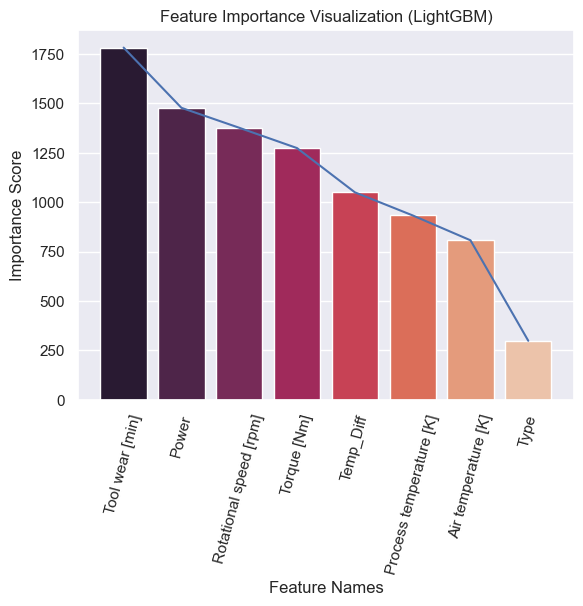

In [109]:
# Plot a bar chart to show the importance of each feature
sns.barplot(data=Importance_features, x="Feature", y="Importance", palette="rocket")

# Add a line plot on top to visualize the trend of feature importance
sns.lineplot(data=Importance_features, x="Feature", y="Importance")

# Label the x-axis to indicate feature names
plt.xlabel("Feature Names")

# Label the y-axis to indicate their corresponding importance scores
plt.ylabel("Importance Score")

# Add a title to describe the visualization
plt.title("Feature Importance Visualization (LightGBM)")

# Rotate feature names on the x-axis for better readability
plt.xticks(rotation=75)

# Display the final visualization
plt.show()


## Feature Importance Analysis – Conclusion

The feature importance results from the optimized **LightGBM model** reveal that some operational parameters play a far greater role in predicting machine failure than others.

Among all input variables, **Tool wear [min]** stands out as the most influential feature, confirming that as a tool experiences more wear over time, the likelihood of failure increases significantly. This aligns with real-world maintenance behavior where tool degradation directly affects machine reliability.

Next in importance are **Power**, **Rotational speed [rpm]**, and **Torque [Nm]**, which collectively represent the mechanical load and operating stress of the machine. Their high contribution indicates that monitoring performance dynamics and energy usage is crucial for anticipating breakdowns.

**Temperature-related variables**  including **Process temperature**, **Air temperature**, and **Temp_Diff**  also show meaningful influence, emphasizing that temperature imbalance or overheating can signal early signs of system distress.

Finally, the **Type** feature contributes the least, suggesting that the model’s predictive strength lies more in **real-time sensor and operational data** rather than static categorical identifiers.

In summary, the LightGBM model highlights that **mechanical wear, torque, and power patterns** are the strongest predictors of machine failure, reinforcing the value of continuous monitoring and early intervention in predictive maintenance systems.


### Saving and Loading the Trained Model  

This section covers how to **save** the optimized **LightGBM model** as a `.pkl` file and **load** it later for prediction.  
Using **Pickle** ensures the trained model can be reused without retraining, saving both time and computational resources.


In [110]:
# Specify the file path where you want to save the model
save_path = "Best_lgbm_model.pkl"

# Save the model as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(best_lgbm, file)

print("Model saved as pickle file.")


# Specify the file path where you want to save the scaler
save_path = "scaler.pkl"

# Save the scaler as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(scale, file)

print("Scale saved as pickle file.")

# Specify the file path where you want to save the scaler
save_path = "LabelEncoder.pkl"
# Save the labelEncoder as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(le, file)

print("LabelEncoder saved as pickle file.")

Model saved as pickle file.
Scale saved as pickle file.
LabelEncoder saved as pickle file.


In [111]:
# Load the previously saved LightGBM model from the pickle file
model = pickle.load(open("Best_lgbm_model.pkl", "rb"))

# Load the saved scaler used during training for consistent preprocessing
scaler = pickle.load(open("scaler.pkl", "rb"))

# Load the saved LabelEncoder used during training for consistent preprocessing
LabelEncoder = pickle.load(open("LabelEncoder.pkl", "rb"))

## General Project Conclusion

This project successfully developed a **Predictive Maintenance System** capable of detecting potential **machine failures** using real-time sensor data.  
Through a structured workflow that included **data cleaning, feature engineering, exploratory data analysis (EDA), model building, optimization, and deployment**, the project achieved both strong predictive performance and practical interpretability.

The **LightGBM model** emerged as the best-performing algorithm, demonstrating:  
- **Accuracy:** 99.25%  
- **Precision:** 98%  
- **Recall:** 79%  
- **F1-Score:** 0.878  

After **optimizing the LightGBM model**, our evaluation metrics **significantly improved** and are now:  
- **Precision:** 0.98  
- **Recall:** 0.81  
- **F1-Score:** 0.89  
- **Accuracy:** 0.99  

These results indicate that the model is highly reliable in identifying early signs of machine failure while minimizing false alarms.

Key insights from feature importance analysis revealed that:  
- **Tool Wear**, **Power**, and **Rotational Speed** are the most influential indicators of machine health.  
- Temperature-related variables (**Air Temperature**, **Process Temperature**, and **Temperature Difference**) also contribute significantly to failure prediction.

Finally, the trained model was **successfully deployed using Streamlit**, enabling real-time predictions based on user input or sensor feeds.  
This deployment bridges the gap between **data science** and **industrial application**, supporting proactive maintenance decisions, reducing downtime, and improving overall equipment efficiency.

